In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv("../data/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_invalid:
    num_zeros = (df[col] == 0).sum()
    print(f"{col} has {num_zeros} zeros")


Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros


In [9]:

cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)


In [10]:
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].fillna(df[cols_with_zero_invalid].median())


In [12]:
df['Outcome'].value_counts()
df['Outcome'].value_counts(normalize=True)  # in %


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [13]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


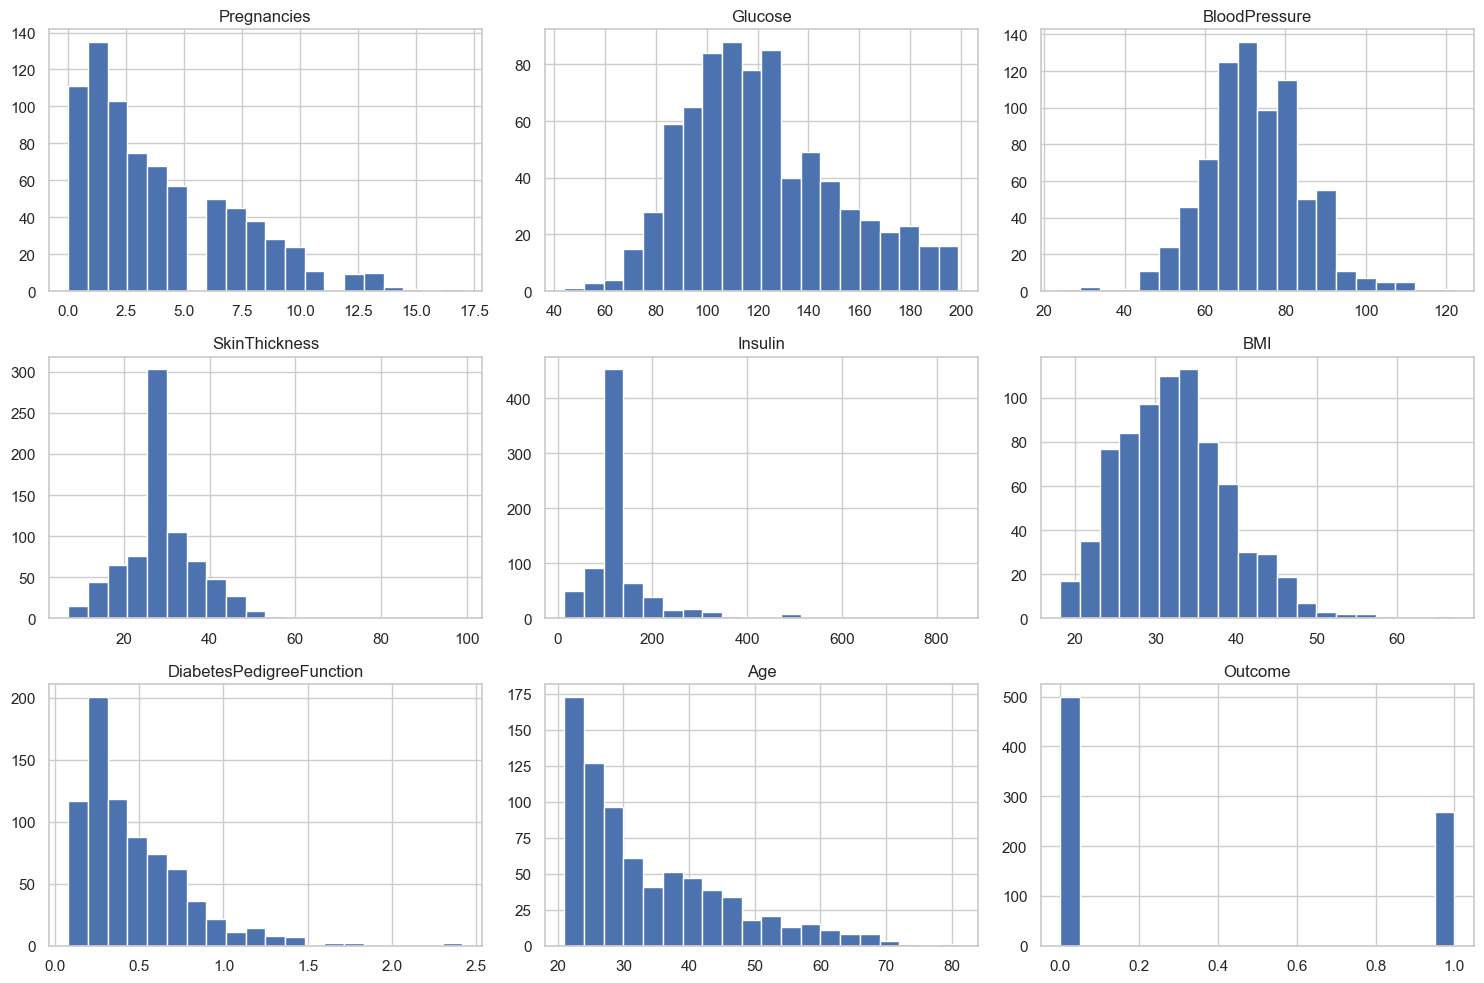

In [14]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

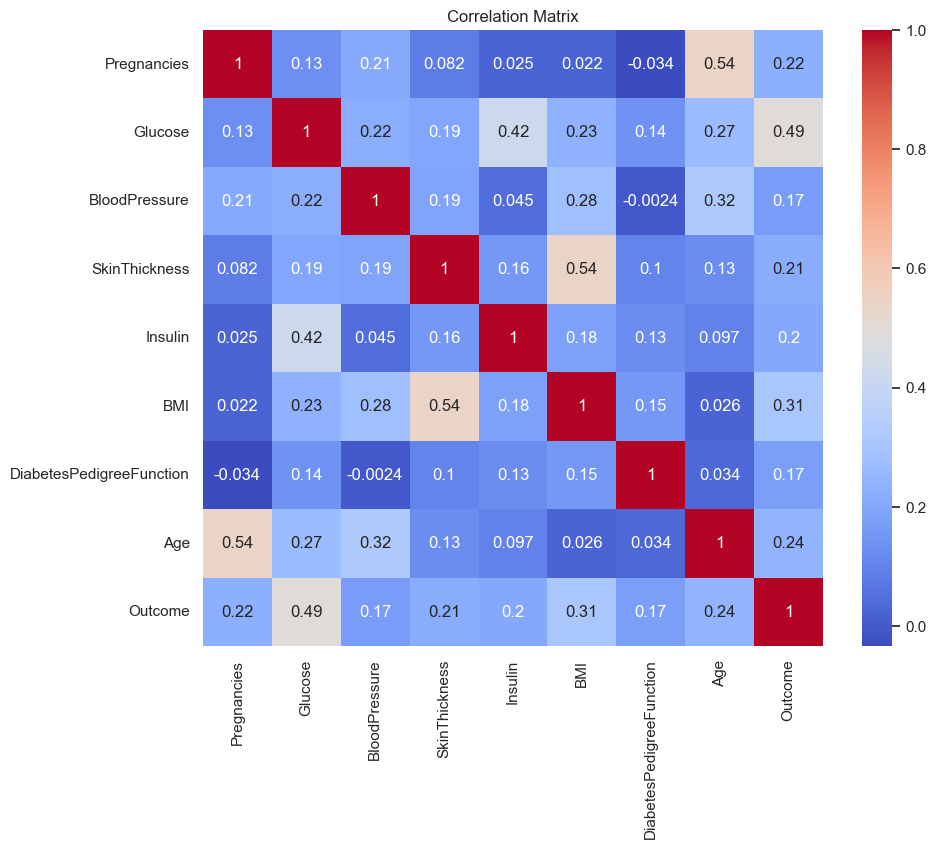

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [16]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, pd.NA)


df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())


In [17]:
X = df.drop('Outcome' , axis=1)
y = df['Outcome']

In [18]:
X_train, X_test , y_train , y_test = train_test_split(X , y, test_size=0.2, random_state=42, stratify=y)

In [19]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 614
Testing samples: 154


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [21]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7012987012987013

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


Confusion Matrix:
 [[81 19]
 [27 27]]


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [25]:
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6818181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.55      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.68      0.68       154


Confusion Matrix:
 [[78 22]
 [27 27]]


In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train , y_train)

RandomForestClassifier()

In [27]:
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154


Confusion Matrix:
 [[82 18]
 [24 30]]


In [28]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train , y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6753246753246753

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       100
           1       0.54      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154


Confusion Matrix:
 [[77 23]
 [27 27]]


In [30]:
svm_model = SVC(probability=True)
svm_model.fit(X_train , y_train)

SVC(probability=True)

In [31]:
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154


Confusion Matrix:
 [[87 13]
 [30 24]]


In [32]:
xgb_model = XGBClassifier(use_label_encoder = False, eval_metric='logloss')
xgb_model.fit(X_train , y_train)

c:\Users\Sandra Kimiring\OneDrive\Desktop\diabetes-prediction-ml-1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Confusion Matrix:
 [[84 16]
 [21 33]]


### 🔍 Model Evaluation Summary (Diabetes Prediction)

| Model             | Accuracy | Precision (1) | Recall (1) | F1-Score (1) |
|------------------|----------|---------------|------------|--------------|
| XGBoost          | **0.76** | **0.67**      | **0.61**   | **0.64**     |
| Random Forest    | 0.73     | 0.64          | 0.56       | 0.59         |
| SVM              | 0.72     | 0.65          | 0.44       | 0.53         |
| Logistic Reg.    | 0.70     | 0.59          | 0.50       | 0.54         |
| Decision Tree    | 0.68     | 0.55          | 0.48       | 0.51         |
| K-Nearest Neigh. | 0.68     | 0.54          | 0.50       | 0.52         |

**Key Takeaway:**  
XGBoost performs best overall and balances high recall with good precision, making it ideal for detecting diabetic patients.  


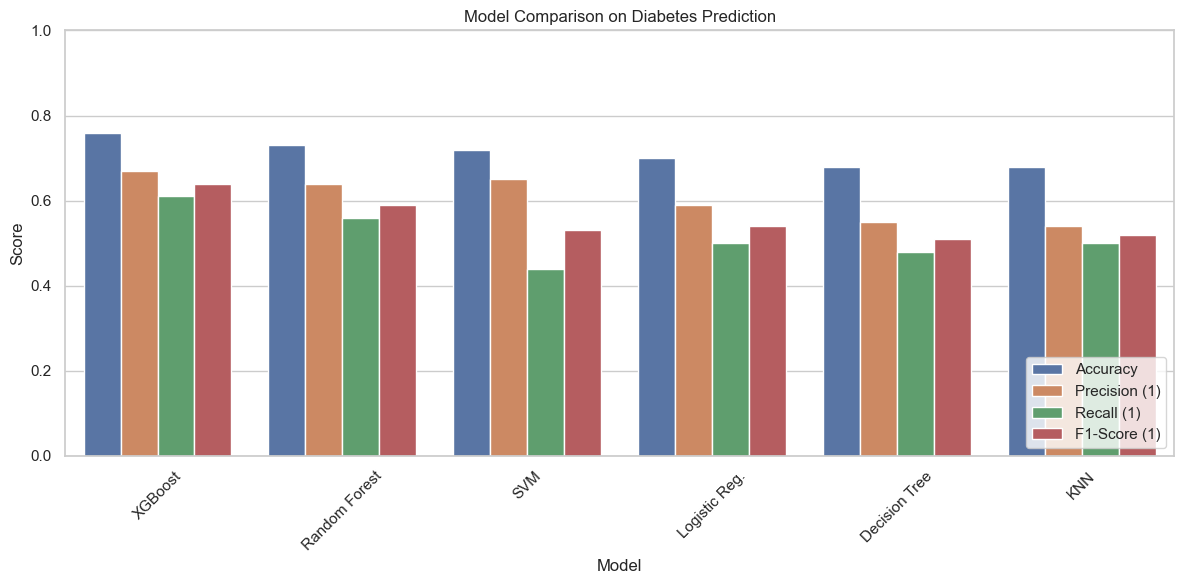

In [34]:
models = ['XGBoost', 'Random Forest', 'SVM', 'Logistic Reg.', 'Decision Tree', 'KNN']
accuracy = [0.76, 0.73, 0.72, 0.70, 0.68, 0.68]
precision_1 = [0.67, 0.64, 0.65, 0.59, 0.55, 0.54]
recall_1 = [0.61, 0.56, 0.44, 0.50, 0.48, 0.50]
f1_1 = [0.64, 0.59, 0.53, 0.54, 0.51, 0.52]

# Create DataFrame
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision (1)': precision_1,
    'Recall (1)': recall_1,
    'F1-Score (1)': f1_1
})


df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Comparison on Diabetes Prediction')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

#  Initialize the model
xgb_model = XGBClassifier(eval_metric='logloss')


# Randomized Search
random_search = RandomizedSearchCV(
    estimator= xgb_model,
    param_distributions=param_dist,
    n_iter=30,                
    scoring='f1',            
    cv=5,                     
    verbose=1,
    random_state=42,
    n_jobs=-1
)

#Fit
random_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[84 16]
 [22 32]]


In [36]:
import joblib
joblib.dump(best_model, '../models/xgb_diabetes_model.joblib')



['../models/xgb_diabetes_model.joblib']